# CggR
Simulation using StochPy, with model and numbers taken from:

Ferguson ML, Le Coq D, Jules M, Aymerich S, Radulescu O, Declerck N, et al. Reconciling molecular regulatory mechanisms with noise patterns of bacterial metabolic promoters in induced and repressed states. Proc Natl Acad Sci U S A. 2012.

![image1.png](image1.png)
![image2.png](image2.png)

In [1]:
!cat /Users/mattferguson/Stochastic-Gillespie-Simulations/CggR_glucose.psc

# Stochastic Simulation Algorithm input format

R1:
    $pool > TF
    kTFsyn
R2:
    TF > $pool
    kTFdeg*TF
R3:
    TFactive > $pool
    kTFdeg*TFactive
R4:
    TF > TFactive
    kActivate*TF
R5:
    TFactive > TF
    kInactivate*TFactive
R6:
    TFactive > mRNA + TFactive
    kmRNAsyn*(TFactive/(TFactive+kX))
R7:
    mRNA > $pool
    kmRNAdeg*mRNA
R8:
    mRNA > Protein + mRNA
    kProteinsyn*mRNA
R9:
    Protein > $pool
    kProteindeg*Protein

# InitPar
kTFsyn = 200
kTFdeg = 20
kActivate = 2000
kInactivate = 200
kX = 5
kmRNAsyn = 240
kmRNAdeg = 20
kProteinsyn = 400
kProteindeg = 2

# InitVar
TF = 2
TFactive = 10
mRNA = 10
Protein = 220


In [2]:
def doSequentialSim(smod,n_generations,cell_division_times):    
    for i in range(1,n_generations):     
        ### divide each species between two daughter cells ###        
        for j in range(0,len(smod.data_stochsim.species_labels)): 
            species_amount = smod.SSA.sim_output[-2][1:][j]                 
            if species_amount:
                smod.settings.X_matrix[j] = np.random.binomial(n=species_amount
                                                               ,p=0.5,size=1)                
        ### replace last time point with species amounts after division ###
        species_after_division = copy.deepcopy(list(smod.settings.X_matrix))
        species_after_division.insert(0,cell_division_times[0:i].sum())
        species_after_division.append(np.NAN) # no reaction occurred at cell division
        smod.SSA.sim_output[-1] = copy.deepcopy(species_after_division)                         
        ### Set settings for new simulation and simulate the next generation ### 
        smod.settings.starttime = copy.deepcopy(smod.SSA.sim_output[-1][0])
        smod.settings.endtime = smod.settings.starttime + cell_division_times[i]
        smod.SSA.Execute(smod.settings,False) # do stochastic simulation
        
    smod.FillDataStochsim() # add all data to data_stochsim object

In [3]:
import stochpy, numpy as np,copy,os,matplotlib.gridspec as gridspec
smod = stochpy.SSA()
smod.Model('CggR_glucose.psc',dir=os.getcwd())
T_GENERATION = 60


#######################################################################
#                                                                     #
#            Welcome to the interactive StochPy environment           #
#                                                                     #
#######################################################################
#  StochPy: Stochastic modeling in Python                             #
#  http://stochpy.sourceforge.net                                     #
#  Copyright(C) T.R Maarleveld, B.G. Olivier, F.J Bruggeman 2010-2015 #
#  DOI: 10.1371/journal.pone.0079345                                  #
#  Email: tmd200@users.sourceforge.net                                #
#  VU University, Amsterdam, Netherlands                              #
#  Centrum Wiskunde Informatica, Amsterdam, Netherlands               #
#  StochPy is distributed under the BSD licence.                      #
###############################################################

### 1: Do short simulations for a time series plot ###

In [4]:
N_GENERATIONS = 10
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS)) 
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)

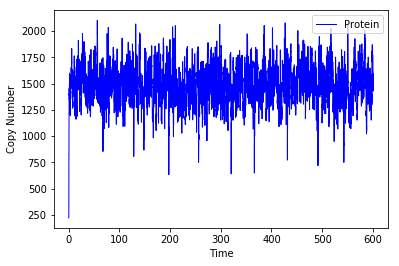

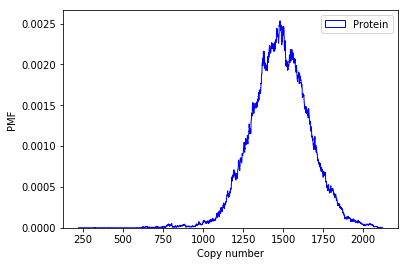

In [ ]:
smod.PlotSpeciesTimeSeries(species2plot=['Protein'],colors =  ['blue'])
smod.PlotSpeciesDistributions(species2plot=['Protein'],colors =  ['blue'])

### 2: Do long simulation for probability density function of protein copy numbers ###

In [ ]:
N_GENERATIONS = 1000
CELL_DIVISION_TIMES = abs(np.random.gamma(T_GENERATION,1,size=N_GENERATIONS))
smod.DoStochSim(end=CELL_DIVISION_TIMES[0],mode='time',trajectories=1)
doSequentialSim(smod,N_GENERATIONS,CELL_DIVISION_TIMES)

In [ ]:
smod.PlotSpeciesTimeSeries(species2plot=['TF'],colors =  ['red'])
smod.PlotSpeciesDistributions(species2plot=['TF'],colors =  ['red'])
smod.PlotSpeciesTimeSeries(species2plot=['mRNA'],colors =  ['green'])
smod.PlotSpeciesDistributions(species2plot=['mRNA'],colors =  ['green'])
smod.PlotSpeciesTimeSeries(species2plot=['Protein'],colors =  ['blue'])
smod.PlotSpeciesDistributions(species2plot=['Protein'],colors =  ['blue'])